In [1]:
import datetime
from WindPy import *
w.start()
import pandas as pad

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


In [2]:
if datetime.now().hour >= 15:
    today = datetime.now().strftime('%Y-%m-%d')
else:
    today = (datetime.now() - timedelta(1)).strftime('%Y-%m-%d')
today

'2020-04-08'

In [3]:
datas1 = w.wset("sectorconstituent","date=" + today +";sectorid=a001010100000000")
assert datas1.ErrorCode == 0, 'WSET未处理成功，ErrorCode={}，含义为{}'.format(datas1.ErrorCode, datas1.Date)
codes = datas1.Data[1]

In [4]:
error, datas = w.wss(codes, "pct_chg,trade_status,maxupordown","tradeDate=" + today + ";cycle=D", usedf=True)
assert error == 0, 'WSET未处理成功，ErrorCode={}，含义为{}'.format(error, datas.value)

In [5]:
datas.columns = ['涨跌幅', '交易状态', "涨跌停状态"]
datas

,涨跌幅,交易状态,涨跌停状态
000001.SZ,-0.776398,交易,0.0
000002.SZ,-0.406354,交易,0.0
000004.SZ,-1.403957,交易,0.0
000005.SZ,0.000000,交易,0.0
000006.SZ,-1.276596,交易,0.0
...,...,...,...
688388.SH,-0.687154,交易,0.0
688389.SH,-3.203015,交易,0.0
688396.SH,0.835494,交易,0.0
688398.SH,2.044330,交易,0.0


In [6]:
ret = datas['涨跌幅']
up = sum(ret > 0.0)
down = sum(ret < 0.0)
equal = sum(ret == 0.0)
suspension = sum(datas['交易状态'] == '暂停上市')
limit_up = sum(datas['涨跌停状态'] == 1.0)
limit_down = sum(datas['涨跌停状态'] == -1.0)
status = '涨：{} 平：{} 跌：{} 涨停：{} 跌停：{} 停牌：{}'.format(up, equal, down, limit_up, limit_down, suspension)
print(status)

涨：2148 平：170 跌：1483 涨停：95 跌停：10 停牌：11


In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

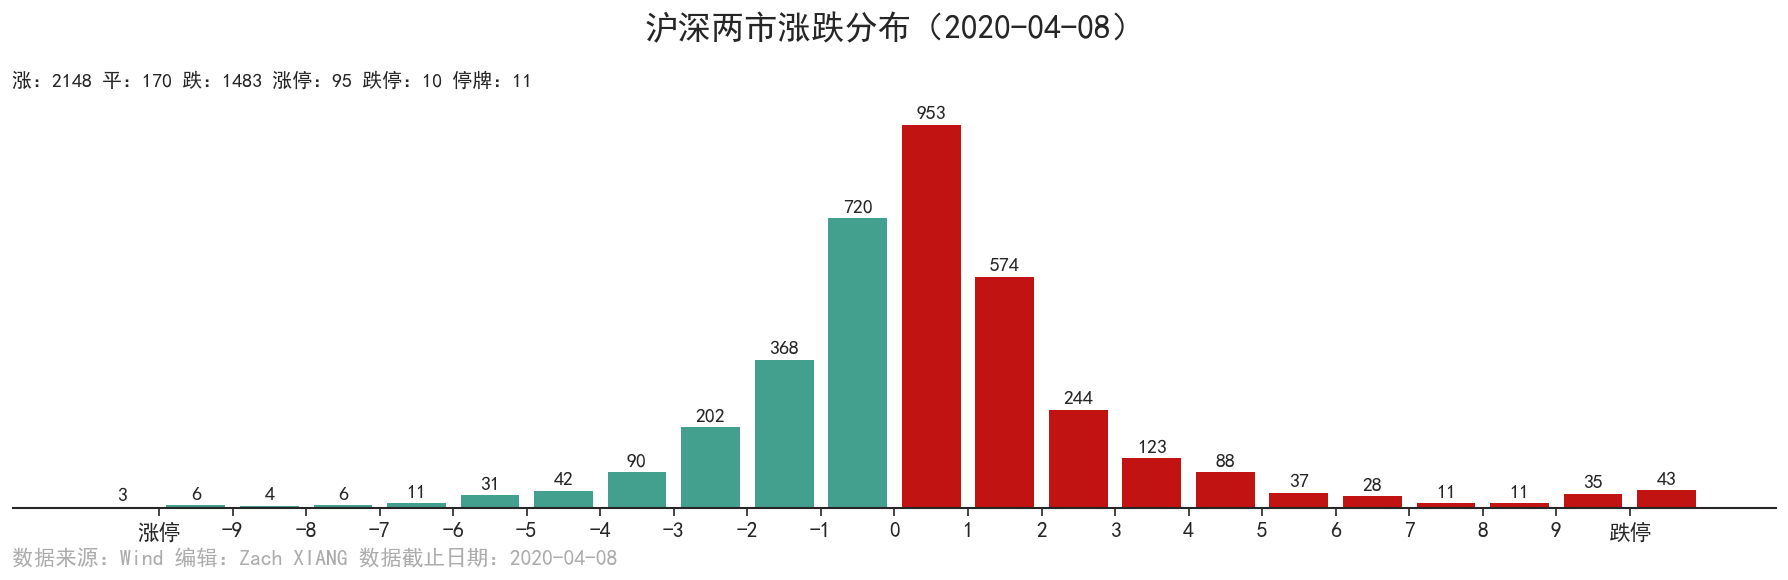

In [8]:
fig,ax = plt.subplots(figsize = (15,5),dpi = 120)
ret = datas['涨跌幅'][(datas['交易状态'] != '暂停上市') & (datas['涨跌幅'] != 0)]
n1,bins1,patches1 = ax.hist(ret[ret < 0], bins = range(-11,1), histtype = 'bar', rwidth = 0.8, align = 'mid', color = '#43A08F')
n2,bins2,patches2 = ax.hist(ret[ret > 0], bins = range(0,12), histtype = 'bar', rwidth = 0.8, align = 'mid', color = '#C21313')
ax.set_yticklabels([])
ax.tick_params(axis='x', which='major', width = 1.0, length = 5, labelsize =13)
ticks = list(bins1[1:-1]) + list(bins2[:-1])
tick_labels = ['涨停'] + ticks[1:-1] + ['跌停']
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

x = list(bins1[:-1]) + list(bins2[:-1])
y = list(n1) + list(n2)
for xloc,text in zip(x,y):
    ax.text(xloc+0.5, text+15,str(int(text)), ha = 'center', fontsize=12)


ax.set_title('沪深两市涨跌分布（{}）'.format(today), loc = 'center', pad = 40, fontsize = 20)
ax.text(-12, 1050, status, ha='left', fontsize=12)
ax.text(-12, -150, '数据来源：Wind 编辑：Zach XIANG 数据截止日期：{}'.format(today), fontsize=13, alpha=0.5, ha='left', va='bottom', color='#5a5a5a')

fig.tight_layout()
        
plt.savefig('沪深两市涨跌分布（{}）.jpg'.format(today))